In [6]:
!pip install -q ultralytics
from IPython.display import clear_output
clear_output()


In [11]:
!cp -r /kaggle/input/palcode-dataset/Palcode /kaggle/working/
!ls /kaggle/working/Palcode



classes.txt  images  labels


In [12]:
data_yaml_content = """
train: /kaggle/working/Palcode/images/train
val: /kaggle/working/Palcode/images/val

nc: 2
names: ['door', 'window']
"""

with open("/kaggle/working/Palcode/data.yaml", "w") as f:
    f.write(data_yaml_content.strip())

print("✅ data.yaml created")


✅ data.yaml created


In [13]:
!pip install ultralytics --quiet
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # using nano version for faster training

results = model.train(
    data='/kaggle/working/Palcode/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    name='palcode_yolo_model',
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 84.7MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Palcode/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=palcode_yolo_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/Palcode/labels/train... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 244.72it/s]

train: New cache created: /kaggle/working/Palcode/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2393.8±256.8 MB/s, size: 593.0 KB)


val: Scanning /kaggle/working/Palcode/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 656.71it/s]

val: New cache created: /kaggle/working/Palcode/labels/val.cache
Plotting labels to runs/detect/palcode_yolo_model/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/palcode_yolo_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G       2.48      4.147      1.502        239        640: 100%|██████████| 2/2 [00:12<00:00,  6.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all          5        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      2.231      4.118      1.461        318        640: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.928      3.965      1.376        105        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          5        132   0.000711    0.00625    0.00036   0.000144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      2.165      3.945      1.333        239        640: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          5        132    0.00336     0.0312    0.00179   0.000841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.999      3.838      1.232        266        640: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132    0.00584     0.0563    0.00326    0.00166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      2.247      3.808      1.253        278        640: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132    0.00677     0.0688    0.00391    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.905      3.523      1.192        149        640: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          5        132     0.0072      0.075    0.00416    0.00257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      2.206      3.489      1.203        303        640: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132    0.00788     0.0813    0.00465      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.897      3.137       1.15        253        640: 100%|██████████| 2/2 [00:07<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132      0.008     0.0813    0.00475    0.00328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G       1.85      2.683      1.142        202        640: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5        132    0.00792     0.0813     0.0047    0.00341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.906      2.412      1.103        265        640: 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132      0.016      0.166     0.0731     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.788      2.101      1.051        213        640: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          5        132      0.016      0.166     0.0731     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.941      2.282      1.163        168        640: 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          5        132     0.0255      0.272      0.161     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      2.069      2.362      1.127        247        640: 100%|██████████| 2/2 [00:07<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all          5        132     0.0266      0.297      0.187     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.763       1.99      1.089        197        640: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132     0.0266      0.297      0.187     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.802      1.954      1.097        177        640: 100%|██████████| 2/2 [00:07<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          5        132     0.0255      0.297       0.19      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.817      1.937      1.087        150        640: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132     0.0223      0.256      0.166      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.934      1.817      1.084        360        640: 100%|██████████| 2/2 [00:08<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132     0.0223      0.256      0.166      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.736      1.878      1.109        232        640: 100%|██████████| 2/2 [00:07<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          5        132     0.0208      0.225      0.154     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.766      1.776      1.092        209        640: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132     0.0208      0.225      0.154     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.754      1.778      1.089        259        640: 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          5        132     0.0189      0.194      0.156     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.749      1.718      1.067        174        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all          5        132     0.0189      0.194      0.156     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.886      1.763      1.089        229        640: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          5        132      0.463     0.0792       0.14     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G       1.66      1.649      1.062        158        640: 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          5        132      0.463     0.0792       0.14     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G       1.76       1.77      1.123        228        640: 100%|██████████| 2/2 [00:07<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all          5        132      0.367     0.0688      0.141     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.858      1.655      1.067        318        640: 100%|██████████| 2/2 [00:07<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          5        132      0.367     0.0688      0.141     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G       1.78      1.741      1.088        235        640: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          5        132      0.367     0.0688      0.141     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.853      1.608      1.066        377        640: 100%|██████████| 2/2 [00:07<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          5        132      0.372      0.109      0.171      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G       1.93      1.647      1.072        278        640: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all          5        132      0.372      0.109      0.171      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.793      1.531      1.098        197        640: 100%|██████████| 2/2 [00:08<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all          5        132      0.441      0.156      0.211      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.584      1.409      1.058        221        640: 100%|██████████| 2/2 [00:10<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all          5        132      0.441      0.156      0.211      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.715      1.514      1.099        210        640: 100%|██████████| 2/2 [00:08<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132      0.441      0.156      0.211      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.672      1.471      1.034        278        640: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all          5        132      0.439      0.214      0.298      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.624      1.396      1.019        203        640: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132      0.439      0.214      0.298      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.571      1.439      1.056        191        640: 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all          5        132      0.439      0.214      0.298      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.485       1.38      1.025        155        640: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          5        132      0.719      0.339      0.403      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.593      1.398      1.039        166        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.719      0.339      0.403      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G       1.64      1.326      1.015        274        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.719      0.339      0.403      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.407      1.166      1.002        225        640: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5        132        0.6      0.371      0.442      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.554      1.262     0.9981        277        640: 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132        0.6      0.371      0.442      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.632      1.362      1.038        211        640: 100%|██████████| 2/2 [00:08<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132        0.6      0.371      0.442      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.522      1.338       1.03        262        640: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.546      0.385      0.438       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.419      1.179      1.007        169        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.546      0.385      0.438       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.593      1.365      1.004        160        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.546      0.385      0.438       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.594      1.425      1.034        185        640: 100%|██████████| 2/2 [00:07<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          5        132      0.546      0.385      0.438       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.622       1.28      1.022        222        640: 100%|██████████| 2/2 [00:07<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.573      0.416      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G       1.63      1.323      1.054        200        640: 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.573      0.416      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.557      1.358      1.016        236        640: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.573      0.416      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.506       1.25      1.006        224        640: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.573      0.416      0.449      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.472      1.214     0.9841        203        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.665      0.459      0.484      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.601      1.287     0.9991        231        640: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.665      0.459      0.484      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.548      1.268     0.9795        234        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.665      0.459      0.484      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      1.439      1.255      1.002        196        640: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.665      0.459      0.484      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.442      1.198      1.014        230        640: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.665      0.441      0.478      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.424      1.223     0.9804        148        640: 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5        132      0.665      0.441      0.478      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.459      1.165      1.009        249        640: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.665      0.441      0.478      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.375      1.116     0.9825        189        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.665      0.441      0.478      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.514       1.26      0.971        176        640: 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.608      0.458      0.465      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.533       1.23      1.006        235        640: 100%|██████████| 2/2 [00:08<00:00,  4.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.608      0.458      0.465      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      1.482      1.163     0.9799        264        640: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          5        132      0.608      0.458      0.465      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.553      1.278      1.035        195        640: 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.608      0.458      0.465      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.513      1.263      1.002        267        640: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5        132      0.674      0.464      0.496      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.416      1.154     0.9749        308        640: 100%|██████████| 2/2 [00:08<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5        132      0.674      0.464      0.496      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.493      1.126     0.9955        215        640: 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.674      0.464      0.496      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      1.467      1.123     0.9646        290        640: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          5        132      0.674      0.464      0.496      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      1.388      1.154     0.9597        206        640: 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.685      0.451      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.382      1.058     0.9356        302        640: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.685      0.451      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      1.544      1.245     0.9804        258        640: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.685      0.451      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.522      1.179     0.9771        218        640: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          5        132      0.685      0.451      0.502      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      1.517      1.229      1.006        225        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.719      0.511      0.536      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      1.458      1.157     0.9736        365        640: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.719      0.511      0.536      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.404      1.098     0.9765        214        640: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.719      0.511      0.536      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      1.399      1.126     0.9761        193        640: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.719      0.511      0.536      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.589      1.269     0.9856        218        640: 100%|██████████| 2/2 [00:07<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.699      0.497      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      1.397      1.098     0.9606        278        640: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.699      0.497      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      1.371      1.126     0.9915        197        640: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.699      0.497      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      1.496      1.125     0.9635        237        640: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.699      0.497      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      1.447      1.177     0.9753        306        640: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.703      0.482      0.556      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.433      1.165     0.9875        161        640: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.703      0.482      0.556      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G       1.43      1.181      1.001        242        640: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.703      0.482      0.556      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      1.424      1.149     0.9342        275        640: 100%|██████████| 2/2 [00:07<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.703      0.482      0.556      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      1.388      1.067      0.953        190        640: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.704      0.472      0.557      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      1.376      1.092     0.9549        238        640: 100%|██████████| 2/2 [00:07<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.704      0.472      0.557      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G       1.49      1.151     0.9454        262        640: 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.704      0.472      0.557      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      1.372      1.135     0.9947        246        640: 100%|██████████| 2/2 [00:07<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.704      0.472      0.557      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      1.474      1.081     0.9884        207        640: 100%|██████████| 2/2 [00:07<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.727      0.494      0.584      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      1.279      1.069      0.936        244        640: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.727      0.494      0.584      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      1.325      1.092     0.9879        203        640: 100%|██████████| 2/2 [00:07<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5        132      0.727      0.494      0.584      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      1.162      0.992     0.9635        164        640: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5        132      0.727      0.494      0.584      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      1.327      1.154     0.9728        252        640: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132       0.74      0.511      0.596       0.33


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      1.315      1.196     0.9794        107        640: 100%|██████████| 2/2 [00:07<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132       0.74      0.511      0.596       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      1.253      1.137     0.9388        143        640: 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132       0.74      0.511      0.596       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      1.414      1.311     0.9605        162        640: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          5        132       0.74      0.511      0.596       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      1.238      1.082     0.9548        128        640: 100%|██████████| 2/2 [00:07<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5        132      0.752      0.524      0.614      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      1.372      1.291      1.003        118        640: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        132      0.752      0.524      0.614      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      1.255      1.032      0.974        185        640: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5        132      0.752      0.524      0.614      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      1.277       1.18     0.9603        169        640: 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          5        132      0.752      0.524      0.614      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      1.229     0.9895     0.9456        131        640: 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          5        132      0.762      0.523      0.618      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      1.369      1.266      0.956        149        640: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.762      0.523      0.618      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      1.229      1.062     0.9416        132        640: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5        132      0.762      0.523      0.618      0.334



100 epochs completed in 0.257 hours.
Optimizer stripped from runs/detect/palcode_yolo_model/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/palcode_yolo_model/weights/best.pt, 6.3MB

Validating runs/detect/palcode_yolo_model/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all          5        132      0.763      0.525      0.617      0.334
                  door          5         80      0.833      0.746      0.823      0.526
                window          5         52      0.693      0.303       0.41      0.143
Speed: 1.3ms preprocess, 133.1ms inference, 0.0ms loss, 38.9ms postprocess per image
Results saved to runs/detect/palcode_yolo_model


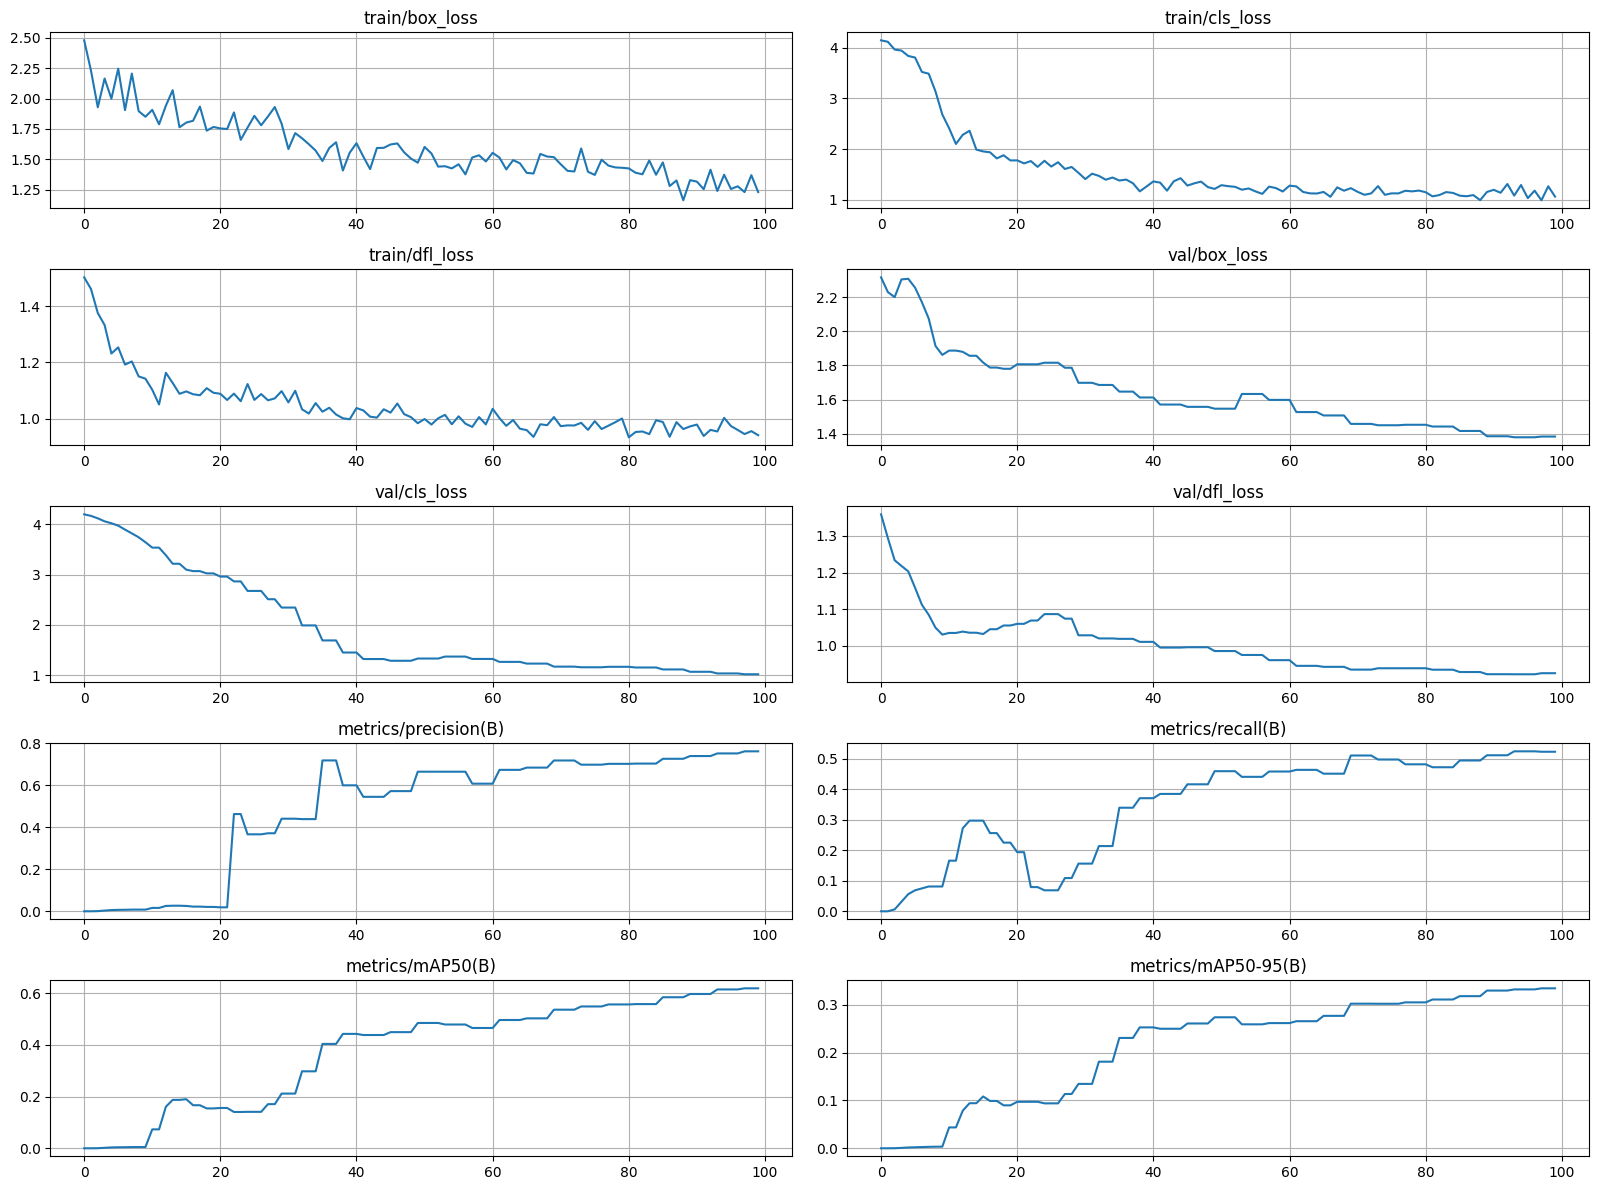

In [ ]:
import matplotlib.pyplot as plt

metrics = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)'
]

plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    if metric in df.columns:
        plt.subplot(5, 2, i)
        plt.plot(df[metric])
        plt.title(metric)
        plt.grid(True)

plt.tight_layout()
plt.savefig("/kaggle/working/palcode_loss_metrics_graphs.png")  
plt.show()


In [ ]:
from ultralytics import YOLO
import os

model = YOLO('/kaggle/working/runs/detect/palcode_yolo_model/weights/best.pt')

output_dir = '/kaggle/working/runs/detect/predict'
if os.path.exists(output_dir):
    import shutil
    shutil.rmtree(output_dir)

results = model.predict(
    source='/kaggle/working/Palcode/images/val/13.png',
    conf=0.25,
    save=True,
    save_dir=output_dir 
)



image 1/1 /kaggle/working/Palcode/images/val/13.png: 640x608 21 doors, 3 windows, 145.1ms
Speed: 4.9ms preprocess, 145.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict


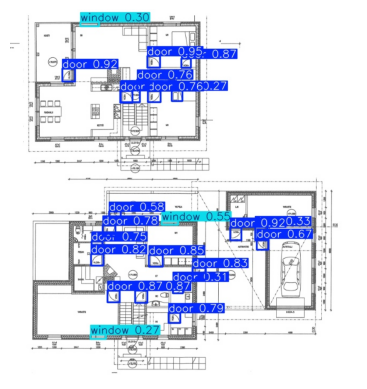

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/kaggle/working/runs/detect/predict/13.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


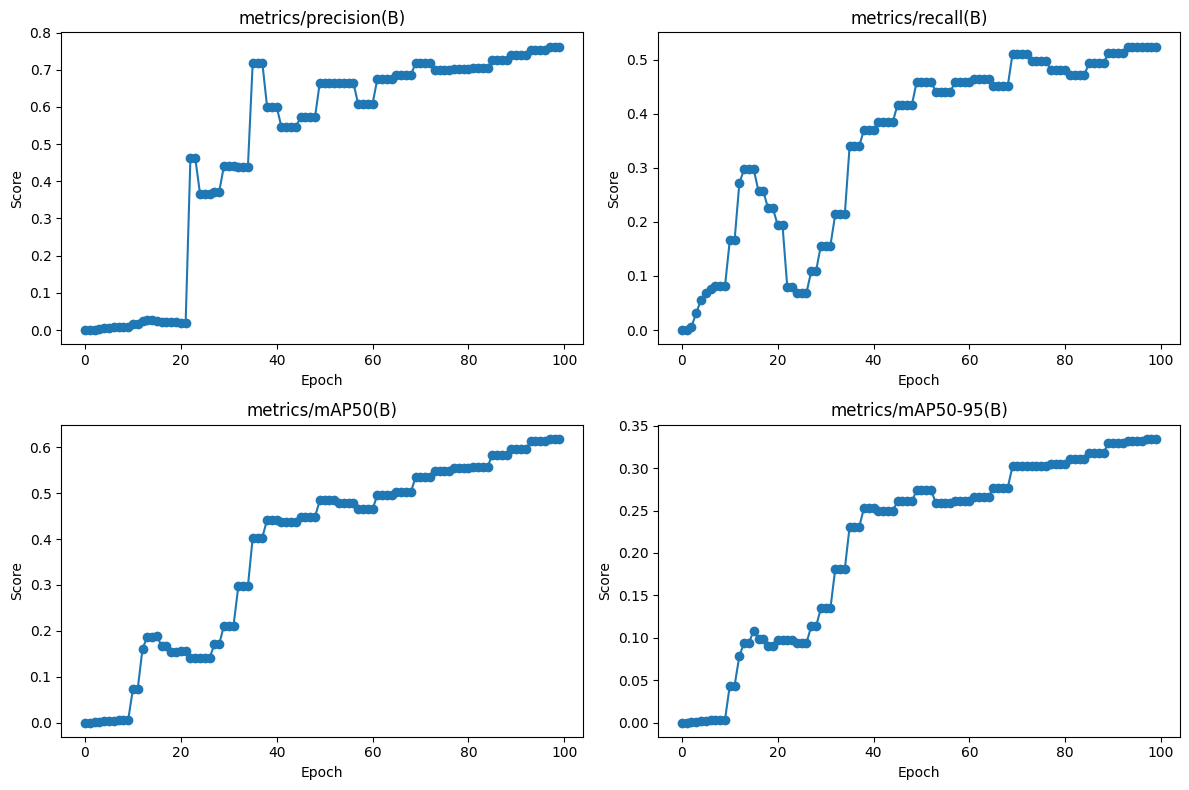

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/kaggle/working/runs/detect/palcode_yolo_model/results.csv"
df = pd.read_csv(csv_path)

metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.plot(df[metric], marker='o')
    plt.title(metric)
    plt.xlabel('Epoch')
    plt.ylabel('Score')

plt.tight_layout()
plt.savefig("/kaggle/working/eval_metrics.png")
plt.show()
